# TIM - TP2 : Manipulation d'histogrammes

Pour cette séance, place aux histogrammes ! Comme vous le savez, c'est un outil très utile dans le cadre du pré-traitement des images.

Le but de ce TP est donc de développer quelques algorithmes de prétraitements d'image à partir des histogrammes de ces dernières.

**_Note :_** Pour cette correction de TP, je vais vous donner pour chaque algorithme (hormis l'égalisation d'histogramme) une version avec boucles et une version sans boucles, histoire que vous voyez les différents temps de calcul.

## Ex. 1 : Commençons par la base...

Cet exercice sera rapide, car déjà vu lors du dernier TP.

Commencez déjà par importer les librairies nécessaires pour le TP et définissez le path de votre base d'images.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import cv2
import time
path_base = '..//Base_images//'

Puis importez l'image Hawke_Bay.jpg en niveaux de gris.

In [2]:
# A compléter
# Importation de l'image Hawke_bay.jpg
hawke_bay = cv2.imread(path_base+'Hawke_Bay.jpg',0)

Vérifiez bien que votre image est chargée en niveaux de gris (c'est-à-dire qu'elle n'a que 2 dimensions).

In [3]:
assert hawke_bay.ndim==2,"L'image chargée n'est pas en niveaux de gris"
print("Tout est ok ;) ")

Tout est ok ;) 


## Ex 2. : Quelques fonctions utiles pour la suite

Dans cette partie, nous allons développer 3 fonctions qui seront utiles pour tout le reste du TP

Tout d'abord, nous allons créer une fonction qui aura pour but de chronométrer une autre fonction. Celle-ci affichera le temps d'exécution de la fonction à chronométrer, et le résultat que cette dernière a produit. On utilisera le package *time*, pour définir deux variables *t_before* et *t_after*. Votre procédure prendra en entrée la fonction à chronométrer, l'image à traiter pour cette fonction et le nom de la fonction (chaine de caractères).

Exemple de signature :
* chronometrer(fonction_a_chronometrer,image,nom_de_la_fonction) => image_traitée

In [4]:
# A compléter
# Ecriture de la fonction de chronométrage d'une fonction
def chronometrer(fonction,fonction_name,image, *args_fonction):
    t_before = time.time()
    new_image = fonction(image, *args_fonction)
    t_after = time.time()
    print("Temps d'exécution de {0} : {1:.2f} sec".format(fonction_name,t_after-t_before))
    return new_image

Testez votre fonction fraichement développée.

In [5]:
def test_fonction(image):
    time.sleep(1)
    return image

def test_fonction_2(image,a):
    time.sleep(2)
    return image

# A compléter
# Test de la fonction développée
hawke_test_1 = chronometrer(test_fonction, "Test fonction 1", hawke_bay)
hawke_test_2 = chronometrer(test_fonction_2, "Test fonction 2", hawke_bay, 1)

Temps d'exécution de Test fonction 1 : 1.00 sec
Temps d'exécution de Test fonction 2 : 2.00 sec


Créer une procédure pour l'affichage d'une image, qui prendra en arguments l'image, la palette de couleurs à utiliser et le titre de cette dernière (argument optionnel).

Exemple de signatures : 
* afficher(image,palette,titre)
* afficher(image,palette)


In [6]:
# A compléter
# Ecriture de la fonction d'affichage d'une image
def afficher(image,palette,titre=""):
    plt.imshow(image,palette,vmin=0, vmax=255)
    plt.title(titre)
    plt.show()

Affichez l'image, en niveaux de gris.

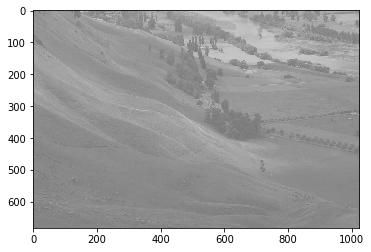

In [7]:
# A compléter
# Affichez l'image en niveaux de gris
afficher(hawke_bay,'gray')

Créez maintenant une fonction qui tracera l'histogramme des niveaux de gris d'une image. Celle-ci prendra en arguments l'image et le titre de l'histogramme (argument optionnel).

Exemple de signatures : 
* histogramme(image,titre)
* histogramme(image)

In [8]:
# A compléter
# Ecriture de la fonction d'affichage de l'histogramme d'une image
def histogramme(image,titre=""):
    plt.hist(image.ravel(),bins=range(0,256))
    plt.title(titre)
    plt.show()

Tracez l'histogramme des niveaux de gris de cette image.

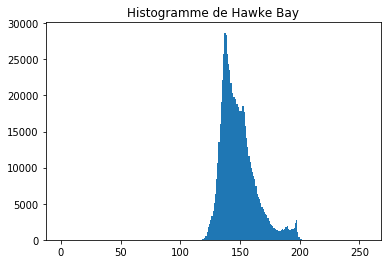

In [9]:
# A compléter
# Affichage de l'histogramme des niveaux de gris de l'image
histogramme(hawke_bay,'Histogramme de Hawke Bay')

## Ex 3. : Binarisation d'images

Le but de la binarisation d’une image est d’affecter un niveau uniforme au pixels pertinents et d´éliminer les autres. C'est une opération assez simple, mais tellement utilisée pour plein de cas concrets.

On va donc l'implémenter en 2 versions : la binarisation par seuillage et la binarisation par extraction d'une fenêtre d'intensité. Il existe d'autres versions de binarisation (binarisation inversée, binarisation avec seuil adaptatif, etc.).

**1.**

Commencons d'abord par la binarisation par seuillage. Le principe est simple : pour un seuil a défini, la binarisation est une tranformation $t(f)$ où, pour tout pixel f de l'image :
\begin{equation*}
    t(f) =
    \begin{cases}
    0 & \quad \text{si } f<a\\
    255 & \quad \text{sinon}\\
    \end{cases}
\end{equation*}

Ecrivez une fonction qui réalisera la binarisation par seuillage sur l'image chargée, avec un seuil a défini.

In [10]:
# A compléter
# Définition du seuil
a = 150

In [11]:
# A compléter
# Création de la fonction binarisation par seuillage 

# VERSION AVEC BOUCLES
def binarisation(img,a):
    rows,cols = img.shape
    new_img = np.empty((rows,cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<a:
                new_img[i,j] = 0
            else:
                new_img[i,j] = 255
    return new_img

# VERSION SANS BOUCLES
def binarisation_faster(img,a):
    return 255*(img>a)

Temps d'exécution de Binarisation par seuillage avec boucles : 1.92 sec
Temps d'exécution de Binarisation par seuillage sans boucles : 0.00 sec


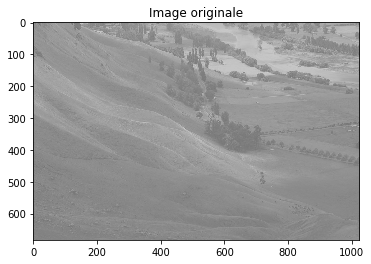

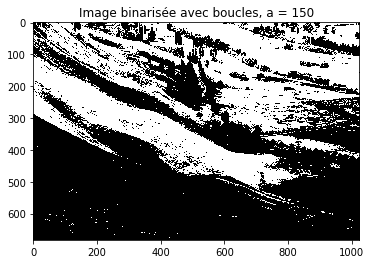

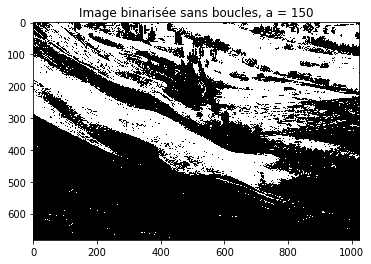

In [12]:
# A compléter
# Affichage de l'image originale et du résultat après 
# binarisation avec le seuil a
hawke_bin = chronometrer(binarisation,"Binarisation par seuillage avec boucles",hawke_bay,a)
hawke_bin_faster = chronometrer(binarisation_faster,"Binarisation par seuillage sans boucles",hawke_bay,a)

afficher(hawke_bay,'gray','Image originale')
afficher(hawke_bin,'gray','Image binarisée avec boucles, a = {}'.format(a))
afficher(hawke_bin_faster,'gray','Image binarisée sans boucles, a = {}'.format(a))

Tracez l'histogramme des niveaux de gris de l'image originale et de l'image après binarisation par seuillage.

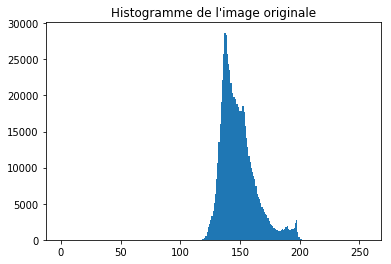

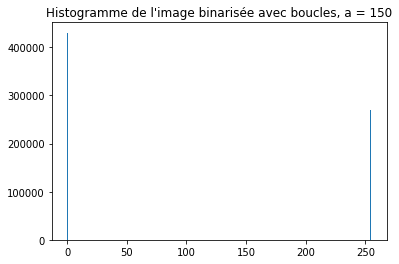

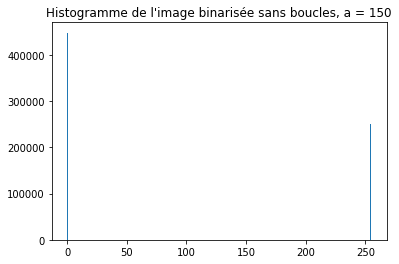

In [13]:
# A compléter
# Affichage de l'histogramme des niveaux de gris de l'image originale et de
# de l'image binarisée avec le seuil a
histogramme(hawke_bay,"Histogramme de l'image originale")
histogramme(hawke_bin,"Histogramme de l'image binarisée avec boucles, a = {}".format(a))
histogramme(hawke_bin_faster,"Histogramme de l'image binarisée sans boucles, a = {}".format(a))

**2.**

Passons à la binarisation par extraction de fenêtre d'intensité. Le principe est similaire à la binarisation par seuillage : pour 2 seuils a et définis, $a<b$, la binarisation est une tranformation $t(f)$ où, pour tout pixel f de l'image :
\begin{equation*}
    t(f) = 
    \begin{cases}
    f & \quad \text{si } a\leq f \leq b\\
    0 & \quad \text{sinon}\\
    \end{cases}
\end{equation*}

Ecrivez une fonction qui réalisera la binarisation par extraction de fenêtre d'intensité sur l'image chargée, avec les seuil a et b définis.

In [14]:
# A compléter
# Définition des seuils
a = 150
b = 200

In [15]:
# A compléter
# Création de la fonction binarisation par extraction d'une fenêtre d'intensité
# VERSION AVEC BOUCLES
def binarisation_fenetre(img,a,b):
    rows,cols = img.shape
    new_img = np.empty((rows,cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<a or img[i,j]>b:
                new_img[i,j] = 0
            else:
                new_img[i,j] = img[i,j]
    return new_img

# VERSION SANS BOUCLES
def binarisation_fenetre_faster(img,a,b):
    return img*(a<img)*(img<b)

Temps d'exécution de Binarisation par extraction de fenêtre d'intensité avec boucles : 2.58 sec
Temps d'exécution de Binarisation par extraction de fenêtre d'intensité sans boucles : 0.00 sec


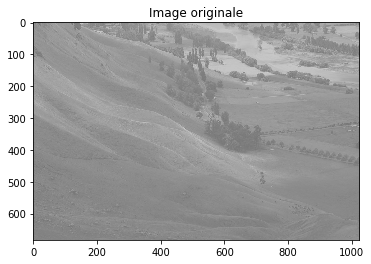

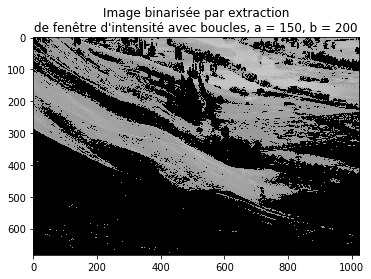

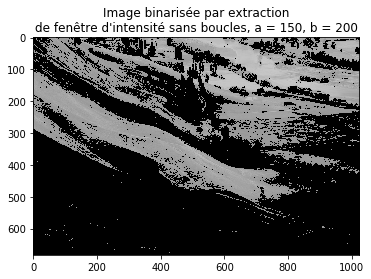

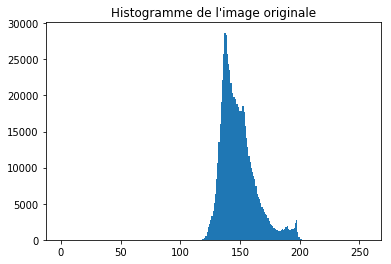

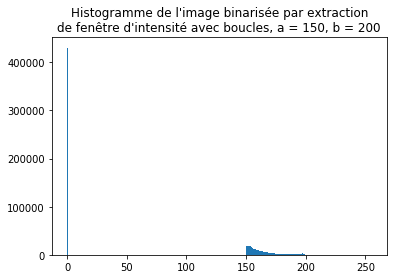

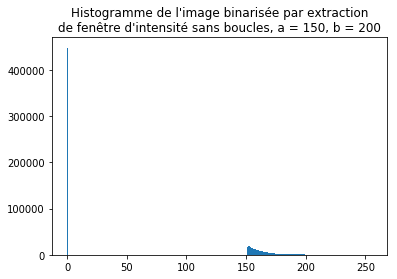

In [16]:
# A compléter
# Affichage de l'image originale et du résultat après 
# binarisation par extraction d'une fenetre d'intensité aux seuils a et b
hawke_bin_fenetre = chronometrer(binarisation_fenetre,"Binarisation par extraction de fenêtre d'intensité avec boucles",hawke_bay,a,b)
hawke_bin_fenetre_faster = chronometrer(binarisation_fenetre_faster,"Binarisation par extraction de fenêtre d'intensité sans boucles",hawke_bay,a,b)
afficher(hawke_bay,'gray','Image originale')
afficher(hawke_bin_fenetre,'gray',"Image binarisée par extraction\nde fenêtre d'intensité avec boucles, a = {}, b = {}".format(a,b))
afficher(hawke_bin_fenetre_faster,'gray',"Image binarisée par extraction\nde fenêtre d'intensité sans boucles, a = {}, b = {}".format(a,b))

# Affichage de l'histogramme des niveaux de gris de l'image originale et de
# de l'image binarisée par extraction d'une fenetre d'intensité aux seuils a et b
histogramme(hawke_bay,"Histogramme de l'image originale")
histogramme(hawke_bin_fenetre,"Histogramme de l'image binarisée par extraction\nde fenêtre d'intensité avec boucles, a = {}, b = {}".format(a,b))
histogramme(hawke_bin_fenetre_faster,"Histogramme de l'image binarisée par extraction\nde fenêtre d'intensité sans boucles, a = {}, b = {}".format(a,b))

## Ex 4. : Expansion de la dynamique

L'expansion de la dynamique est une transformation $t(f)$ qui permet de modifier la dynamique des niveaux de gris dans le but d'améliorer l'aspect visuel de l'image. Pour deux seuils a et b définis, la transformation d'un pixel f de l'image est définie de la manière suivante :
\begin{equation*}
    t(f) = 
    \begin{cases}
    0 & \quad \text{si } f<a\\
    255 & \quad \text{si } f>b\\
    255 \times \frac{f-a}{b-a} & \quad \text{sinon}\\
    \end{cases}
\end{equation*}

**1.**


Définissez vos seuils a et b et créez une fonction qui réalisera l'expansion de la dynamique sur l'image chargée. Affichez l'image originale, celle-ci après l'expansion de la dynamique, et leurs histogrammes correspondants.

In [17]:
# A compléter
# Définition des seuils
a = 140
b = 160

In [18]:
# A compléter
# Création de la fonction expansion de la dynamique
# VERSION AVEC BOUCLES
def exp_dyn(img,a,b):
    rows,cols = img.shape
    new_img = np.empty((rows,cols),dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<a:
                new_img[i,j]=0
            elif img[i,j]>b:
                new_img[i,j]=255
            else:
                new_img[i,j]=255*((img[i,j]-a)/(b-a))
    return new_img

# VERSION SANS BOUCLES
def exp_dyn_faster(img,a,b):
    return np.floor(255*np.clip((img.astype(np.int16)-a)/(b-a),0,1))

Temps d'exécution de Expansion de la dynamique avec boucles : 5.11 sec
Temps d'exécution de Expansion de la dynamique sans boucles : 0.01 sec


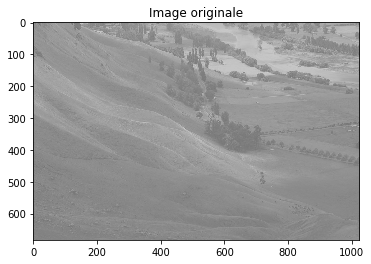

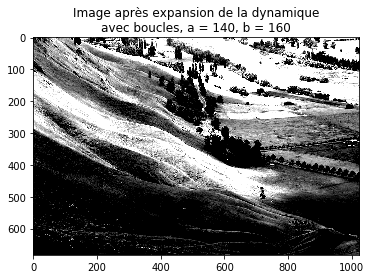

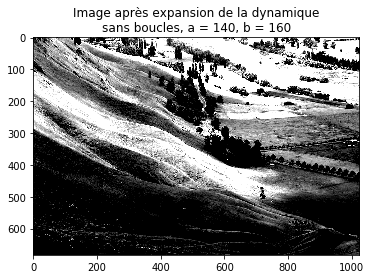

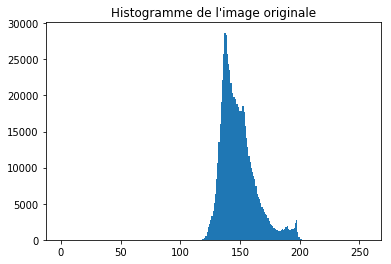

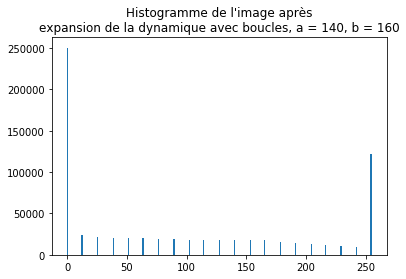

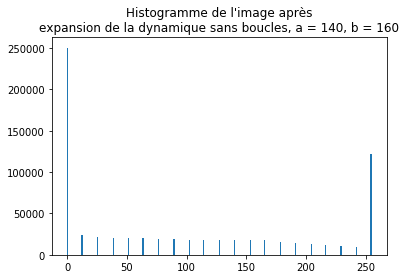

In [19]:
# A compléter
# Affichage de l'image originale et du résultat après 
# expansion de la dynamique aux seuils a et b
hawke_exp_dyn = chronometrer(exp_dyn,"Expansion de la dynamique avec boucles",hawke_bay,a,b)
hawke_exp_dyn_faster = chronometrer(exp_dyn_faster,"Expansion de la dynamique sans boucles",hawke_bay,a,b)
afficher(hawke_bay,'gray','Image originale')
afficher(hawke_exp_dyn,'gray','Image après expansion de la dynamique\navec boucles, a = {}, b = {}'.format(a,b))
afficher(hawke_exp_dyn_faster,'gray','Image après expansion de la dynamique\nsans boucles, a = {}, b = {}'.format(a,b))

# Affichage de l'histogramme des niveaux de gris de l'image originale et de l'image traitée
histogramme(hawke_bay,"Histogramme de l'image originale")
histogramme(hawke_exp_dyn,"Histogramme de l'image après\nexpansion de la dynamique avec boucles, a = {}, b = {}".format(a,b))
histogramme(hawke_exp_dyn_faster,"Histogramme de l'image après\nexpansion de la dynamique sans boucles, a = {}, b = {}".format(a,b))

## Ex 5. : Rehaussement de contraste

L'expansion de la dynamique est une transformation du même type que l'expansion de la dynamique, à savoir la modification des niveaux de gris dans le but d'améliorer l'aspect visuel de l'image. Pour deux seuils a et b définis, la transformation d'un pixel f de l'image est définie de la manière suivante :
\begin{equation*}
    t(f) = 
    \begin{cases}
    \frac{b}{a}f & \quad \text{si } 0 \leq f \leq a\\
    \frac{(255-b)f+255(b-a)}{255-a} & \quad \text{si } a \leq f \leq 255\\
    \end{cases}
\end{equation*}

**1.**


Définissez vos seuils a et b et créez une fonction qui réalisera le réhaussement de contraste sur l'image chargée. Affichez l'image originale, celle-ci après l'expansion de la dynamique, et leurs histogrammes correspondants.

In [20]:
# A compléter
# Définition des seuils
a = 180
b = 100

In [21]:
# A compléter
# Création de la fonction réhaussement de contraste
# VERSION AVEC BOUCLES
def reh_const(img,a,b):
    rows,cols = img.shape
    new_img = np.empty((rows,cols),dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<=a:
                new_img[i,j]=img[i,j]*b//a
            else:
                new_img[i,j]=((255-b)*img[i,j]+255*(b-a))//(255-a)
    return new_img

# VERSION SANS BOUCLES
def reh_const_faster(img,a,b):
    img = img.astype(np.int16)
    new_img = np.empty(img.shape)
    new_img[img<=a]=img[img<=a]*b/a
    new_img[img>a]=((255-b)*img[img>a]+255*(b-a))/(255-a)
    return np.floor(new_img).astype(np.uint8)

Temps d'exécution de Rehaussement de contraste avec boucles : 5.22 sec
Temps d'exécution de Rehaussement de contraste sans boucles : 0.01 sec


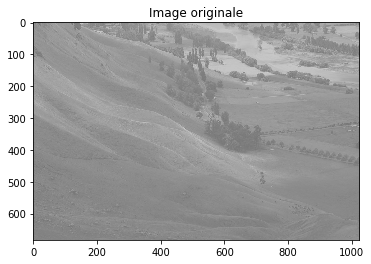

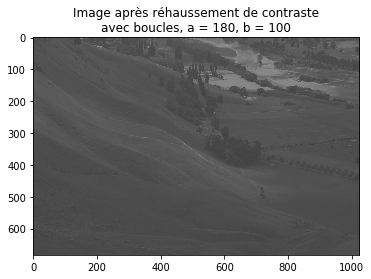

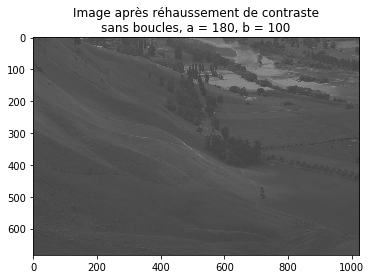

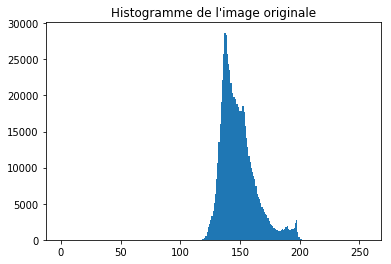

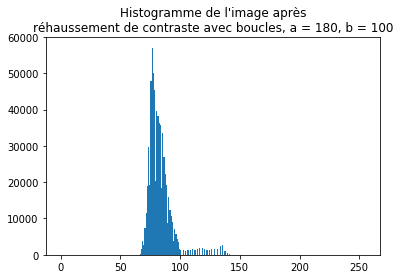

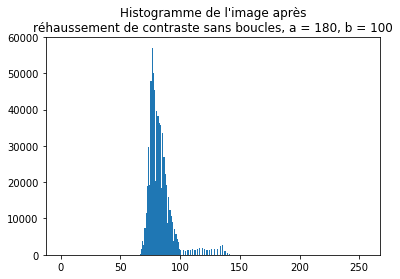

In [22]:
# A compléter
# Affichage de l'image originale et du résultat après 
# réhaussement de contraste aux seuils a et b
hawke_reh_const = chronometrer(reh_const, "Rehaussement de contraste avec boucles",hawke_bay,a,b)
hawke_reh_const_faster = chronometrer(reh_const_faster, "Rehaussement de contraste sans boucles", hawke_bay,a,b)
afficher(hawke_bay,'gray','Image originale')
afficher(hawke_reh_const,'gray','Image après réhaussement de contraste\navec boucles, a = {}, b = {}'.format(a,b))
afficher(hawke_reh_const_faster,'gray','Image après réhaussement de contraste\nsans boucles, a = {}, b = {}'.format(a,b))

# Affichage de l'histogramme des niveaux de gris de l'image originale et de l'image traitée
histogramme(hawke_bay,"Histogramme de l'image originale")
histogramme(hawke_reh_const,"Histogramme de l'image après\nréhaussement de contraste avec boucles, a = {}, b = {}".format(a,b))
histogramme(hawke_reh_const_faster,"Histogramme de l'image après\nréhaussement de contraste sans boucles, a = {}, b = {}".format(a,b))

## Ex 6. : Egalisation d'histogramme

Pour finir ce TP, nous allons implémenter un dernier algorithme : l'égalisation d'histogramme. Comme pour les algorithmes précédents, l'égalisation d'histogramme est une transformation *t(f)* qui a pour objectif de :
* rendre l’histogramme le plus plat possible ;
* distribuer uniformément des niveaux de gris ;
* maximiser l’entropie de l’image ;
* obtenir une image ayant une information maximale.

D'un point de vue du domaine discret, la transformation est définie par :
\begin{equation*}
t(f) = \frac{L-1}{N} \sum_{i=0}^{f} h(i)
\end{equation*}
où L est le nombre de niveaux de gris dont l'image est codée (l'image est en uint8), N le nombre total de pixels de l'image, et h l'histogramme des niveaux de gris de l'image.
Donc $\sum_{i=0}^{f} h(i)$ correspond à l'histogramme cumulé à la valeur f.

**1.**

Commencez d'abord par écrire une fonction qui à partir de l'image, retourne un vecteur correspondant à l'histogramme cumulé des niveaux de gris de cette dernière.

In [23]:
# A compléter
def histo_cum(image):
    unique,counts = np.unique(image,return_counts=True)
    output = np.zeros(256)
    output[unique]=counts
    return np.cumsum(output)

---
**2.**

Ecrivez maintenant la fonction d'équalisation d'histogramme d'une image.

In [24]:
def equal_hist(image):
    L = 256
    rows,cols = image.shape
    N = rows*cols
    return np.floor(((L-1)/N)*histo_cum(image)[image]).astype(np.uint8)

Temps d'exécution de Egalisation d'histogramme : 0.03 sec


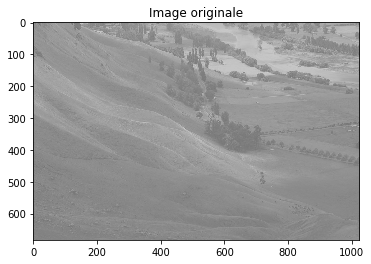

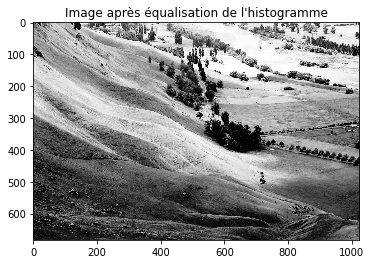

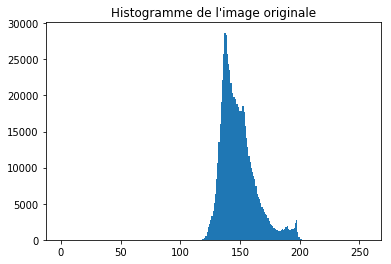

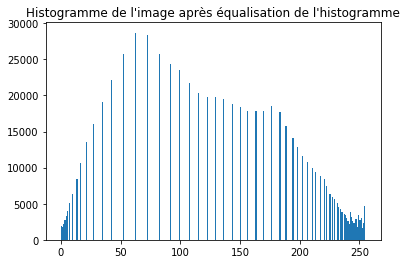

In [25]:
# A compléter
# Affichage de l'image originale et du résultat après 
# égalisation d'histogramme
hawke_equal = chronometrer(equal_hist, "Egalisation d'histogramme", hawke_bay)
afficher(hawke_bay,'gray','Image originale')
afficher(hawke_equal,'gray',"Image après équalisation de l'histogramme")

# Affichage de l'histogramme des niveaux de gris de l'image originale et de l'image traitée
histogramme(hawke_bay,"Histogramme de l'image originale")
histogramme(hawke_equal,"Histogramme de l'image après équalisation de l'histogramme")